In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('army-total-world.csv')

In [5]:
print(df.head())

         country  activeDuty  paramilitary  reserves    total      pop2022
0          China     2185000        660000   1170000  4015000  1448471.400
1          India     1455550       2526950   1155000  5137500  1406631.776
2  United States     1388100             0    844950  2233050   334805.269
3    North Korea     1280000       5889000    600000  7769000    25990.679
4         Russia     1014000        554000   2000000  3568000   145805.947


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       168 non-null    object 
 1   activeDuty    168 non-null    int64  
 2   paramilitary  168 non-null    int64  
 3   reserves      168 non-null    int64  
 4   total         168 non-null    int64  
 5   pop2022       168 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 8.0+ KB
None


In [7]:
print(df.isnull().sum())

country         0
activeDuty      0
paramilitary    0
reserves        0
total           0
pop2022         0
dtype: int64


In [10]:
df.fillna(df.mean(), inplace=True)

TypeError: Could not convert ['ChinaIndiaUnited StatesNorth KoreaRussiaPakistanIranSouth KoreaVietnamEgyptMyanmarIndonesiaBrazilThailandTurkeyColombiaSri LankaJapanSaudi ArabiaMexicoUkraineFranceEritreaMoroccoIraqSouth SudanGermanyAfghanistanIsraelSyriaItalyBangladeshTaiwanUnited KingdomPhilippinesNigeriaGreeceEthiopiaDR CongoAlgeriaAzerbaijanCambodiaVenezuelaSpainPolandMalaysiaAngolaSudanJordanNepalPeruChileArgentinaRomaniaCanadaSouth AfricaUnited Arab EmiratesLebanonAustraliaDominican RepublicSingaporeCubaUzbekistanBelarusUgandaArmeniaOmanEcuadorYemenKazakhstanBulgariaTurkmenistanTunisiaNetherlandsBoliviaChadRwandaBurundiSwedenLaosZimbabweSerbiaHungaryIvory CoastPortugalTanzaniaBelgiumCameroonEl SalvadorKenyaFinlandNorwayAustriaCzech RepublicUruguayGeorgiaLithuaniaSomaliaSwitzerlandGuatemalaKuwaitQatarSlovakiaMauritaniaGhanaCroatiaZambiaCyprusHondurasDenmarkParaguaySenegalMadagascarMaliNicaraguaMozambiqueBurkina FasoKyrgyzstanMalawiBosnia and HerzegovinaDjiboutiRepublic of the CongoNamibiaGuineaMongoliaIrelandCentral African RepublicBotswanaNew ZealandTajikistanTogoSierra LeoneBahrainAlbaniaNorth MacedoniaBeninSloveniaBruneiEstoniaLatviaNigerMoldovaGabonGuinea-BissauTrinidad and TobagoJamaicaPapua New GuineaFijiGuyanaMontenegroLiberiaLesothoMaltaSurinameBelizeEquatorial GuineaBahamasCape VerdeLuxembourgGambiaBarbadosSeychellesAntigua and BarbudaHaitiIcelandMauritiusCosta RicaPanama'] to numeric

In [9]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df['category_column'] = df['category_column'].astype('category').cat.codes

KeyError: 'category_column'

In [13]:
print(df.describe())

         activeDuty  paramilitary      reserves         total       pop2022
count  1.680000e+02  1.680000e+02  1.680000e+02  1.680000e+02  1.680000e+02
mean   1.199320e+05  1.437658e+05  1.494214e+05  4.131192e+05  4.713149e+04
std    2.733041e+05  6.704519e+05  5.244440e+05  1.272817e+06  1.601753e+05
min    0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+02  9.942600e+01
25%    9.412500e+03  0.000000e+00  0.000000e+00  1.441250e+04  4.300066e+03
50%    2.732500e+04  5.400000e+03  4.000000e+01  5.745000e+04  1.118101e+04
75%    1.233250e+05  3.131250e+04  5.270000e+04  2.521250e+05  3.454340e+04
max    2.185000e+06  5.889000e+06  5.000000e+06  1.052200e+07  1.448471e+06


In [18]:

   import seaborn as sns
   import matplotlib.pyplot as plt

   # Гістограма для кількісної змінної
   sns.histplot(df['numerical_column'], bins=10, kde=True)
   plt.show()

   # Коробкова діаграма для аналізу викидів
   sns.boxplot(x=df['numerical_column'])
   plt.show()

   # Діаграма розсіювання для двох кількісних змінних
   sns.scatterplot(x=df['numerical_column_1'], y=df['numerical_column_2'])
   plt.show()

KeyError: 'numerical_column'

In [19]:
df.columns.tolist()
df.dtypes
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols


['activeDuty', 'paramilitary', 'reserves', 'total', 'pop2022']

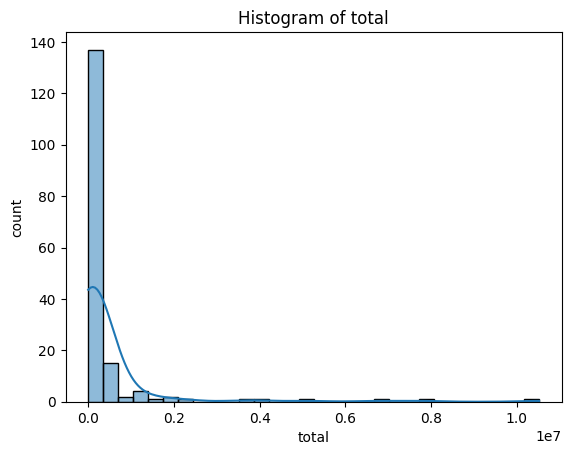

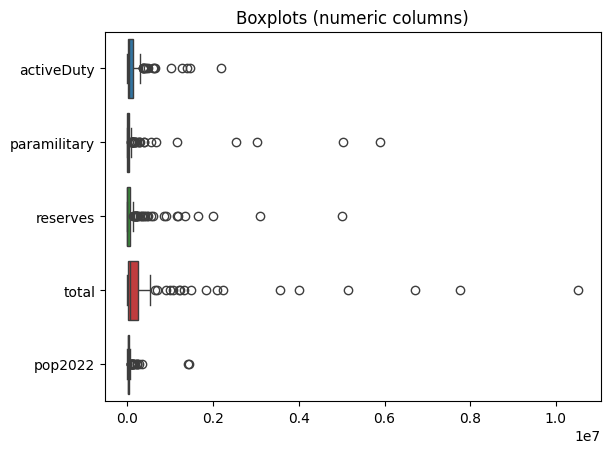

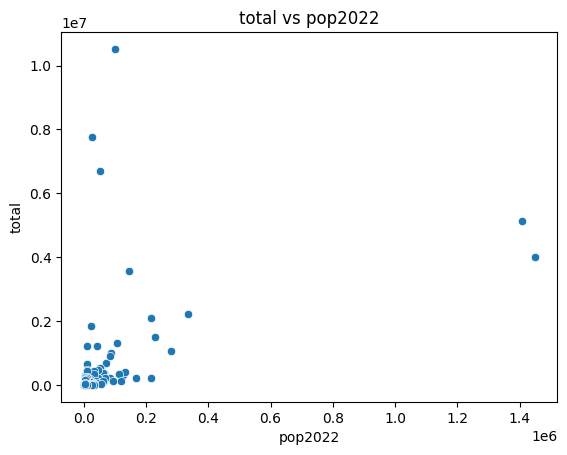

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['activeDuty', 'paramilitary', 'reserves', 'total', 'pop2022']

# 1) Гістограма (приклад для 'total')
sns.histplot(df['total'].dropna(), bins=30, kde=True)
plt.title('Histogram of total')
plt.xlabel('total'); plt.ylabel('count')
plt.show()

# 2) Коробкові діаграми для всіх числових колонок
sns.boxplot(data=df[num_cols], orient='h')
plt.title('Boxplots (numeric columns)')
plt.show()

# 3) Діаграма розсіювання: залежність total від pop2022
sns.scatterplot(x=df['pop2022'], y=df['total'])
plt.title('total vs pop2022')
plt.xlabel('pop2022'); plt.ylabel('total')
plt.show()


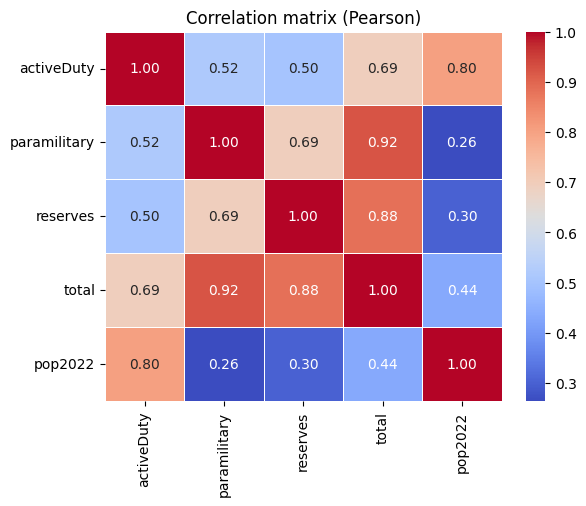

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include='number').columns
corr = df[num_cols].corr(numeric_only=True, method='pearson')

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix (Pearson)')
plt.show()


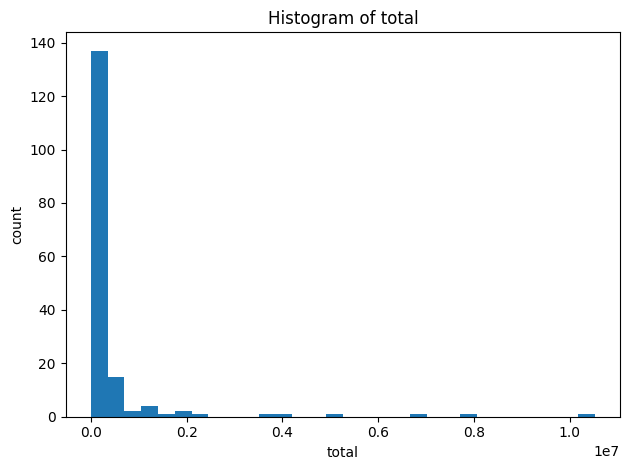

C:\Users\User7\AppData\Local\Temp\ipykernel_16256\3907611508.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[c].dropna() for c in num_cols], labels=num_cols, vert=False)


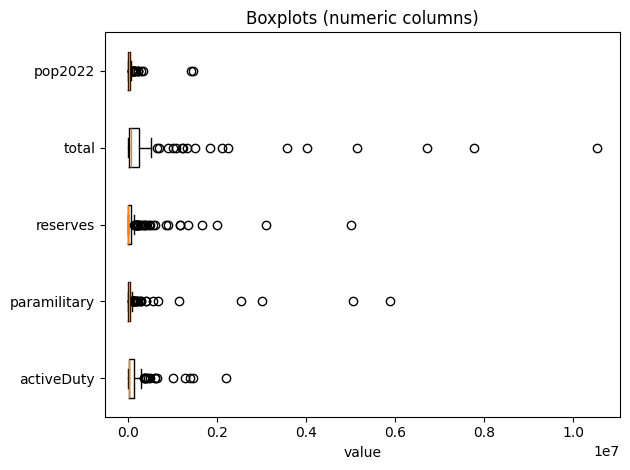

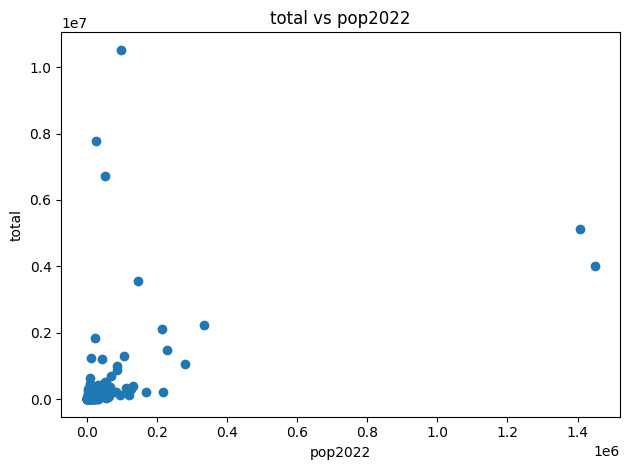

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Папки для звітності
Path("reports/figs").mkdir(parents=True, exist_ok=True)
Path("reports/tables").mkdir(parents=True, exist_ok=True)

# 1) Описова статистика
desc = df.select_dtypes(include='number').describe().T
desc.to_csv("reports/tables/01_describe.csv", index=True)

# 2) Кореляційна матриця
num_cols = df.select_dtypes(include='number').columns
corr = df[num_cols].corr(numeric_only=True, method='pearson')
corr.to_csv("reports/tables/02_corr.csv", index=True)

# 3) Приклади графіків і збереження PNG
# Гістограма
plt.hist(df['total'].dropna(), bins=30)
plt.title('Histogram of total'); plt.xlabel('total'); plt.ylabel('count')
plt.tight_layout(); plt.savefig("reports/figs/01_hist_total.png", dpi=150)
plt.show()

# Boxplot
plt.boxplot([df[c].dropna() for c in num_cols], labels=num_cols, vert=False)
plt.title('Boxplots (numeric columns)'); plt.xlabel('value')
plt.tight_layout(); plt.savefig("reports/figs/02_boxplots.png", dpi=150)
plt.show()

# Scatter total vs pop2022
plt.scatter(df['pop2022'], df['total'])
plt.title('total vs pop2022'); plt.xlabel('pop2022'); plt.ylabel('total')
plt.tight_layout(); plt.savefig("reports/figs/03_scatter_total_vs_pop2022.png", dpi=150)
plt.show()


In [23]:
df.to_csv("reports/03_dataset_processed.csv", index=False)
